In [39]:
import csv
import pandas as pd

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('/home/raffaele/Documents/ml-project/datasets/heart.dat', sep=' ', names=headers)

In [40]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert imput to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

# Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, 13)
# Xtest = Xtest.reshape(Xtest.shape[0], 1, 13)
# ytrain = ytrain.reshape(ytrain.shape[0], 1, 1)
# ytest = ytest.reshape(ytest.shape[0], 1, 1)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


In [68]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.train_loss_history = []
        self.val_accuracy_history = []

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            
            if (output.shape == (1,1)):
                output = output[0]
                
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                output = output.reshape(1, output.shape[0])
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            # append error to plot it later
            self.train_loss_history.append(err)
            # do prediction, cal
            pred = self.predict(x_train)
            acc = self.accuracy(y_train, pred)
            self.val_accuracy_history.append(acc)
            print('epoch %d/%d   error=%f    accuracy=%f' % (i+1, epochs, err,acc))
            
    def accuracy(self, ytrain, yhat):
        acc = np.sum(np.round(yhat) == ytrain) / len(ytrain)
        return acc

In [70]:
import numpy as np

from layers import LayerDense,ActivationLayer
from activations import tanh, tanh_prime, sigmoid, sigmoid_prime
from losses import mse, mse_prime

# network
net = Network()
net.add(LayerDense(13, 5))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(LayerDense(5, 1))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
# train
net.use(mse, mse_prime)
net.fit(Xtrain, ytrain, epochs=100, learning_rate=0.01)

# test
out = net.predict(Xtrain)

epoch 1/100   error=0.254355    accuracy=0.537037
epoch 2/100   error=0.244661    accuracy=0.546296
epoch 3/100   error=0.237405    accuracy=0.550926
epoch 4/100   error=0.230978    accuracy=0.560185
epoch 5/100   error=0.224860    accuracy=0.625000
epoch 6/100   error=0.218861    accuracy=0.657407
epoch 7/100   error=0.212908    accuracy=0.726852
epoch 8/100   error=0.206984    accuracy=0.759259
epoch 9/100   error=0.201097    accuracy=0.773148
epoch 10/100   error=0.195271    accuracy=0.777778
epoch 11/100   error=0.189532    accuracy=0.791667
epoch 12/100   error=0.183912    accuracy=0.787037
epoch 13/100   error=0.178436    accuracy=0.787037
epoch 14/100   error=0.173133    accuracy=0.800926
epoch 15/100   error=0.168023    accuracy=0.805556
epoch 16/100   error=0.163125    accuracy=0.814815
epoch 17/100   error=0.158455    accuracy=0.828704
epoch 18/100   error=0.154022    accuracy=0.828704
epoch 19/100   error=0.149834    accuracy=0.833333
epoch 20/100   error=0.145892    accurac

In [71]:
res = []

for i in out:
    i = np.round(i)
    res.append(i)
    
res = np.array(res)

In [44]:
np.sum(res == ytrain) / len(ytrain)

0.9490740740740741

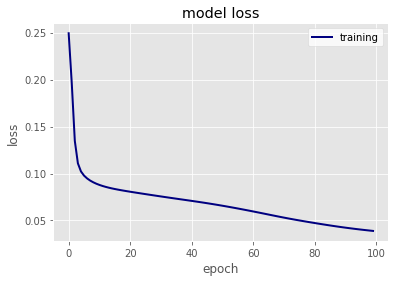

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

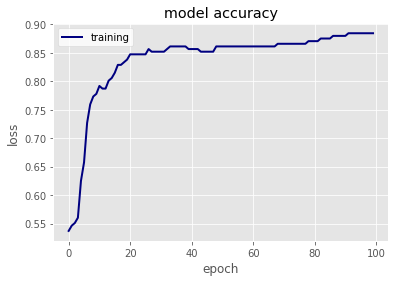

In [72]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()